# tensorflow가 제공하는 데이터셋 확인

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

## MNIST 필기 숫자 데이터셋

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


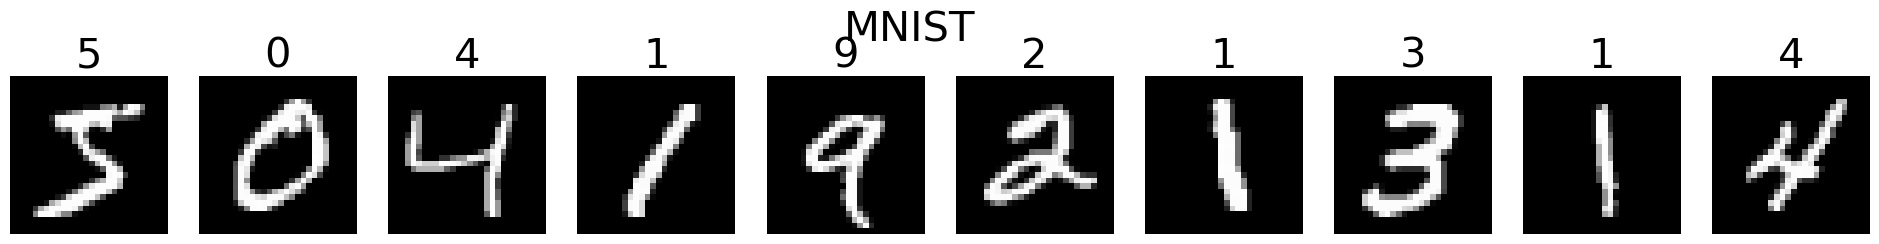

In [43]:
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

plt.figure(figsize=(24,3))
plt.suptitle("MNIST", fontsize=30)
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(str(y_train[i]), fontsize=30)
    plt.axis('off')
plt.show()

## CIFAR-10 자연영상 데이터셋

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


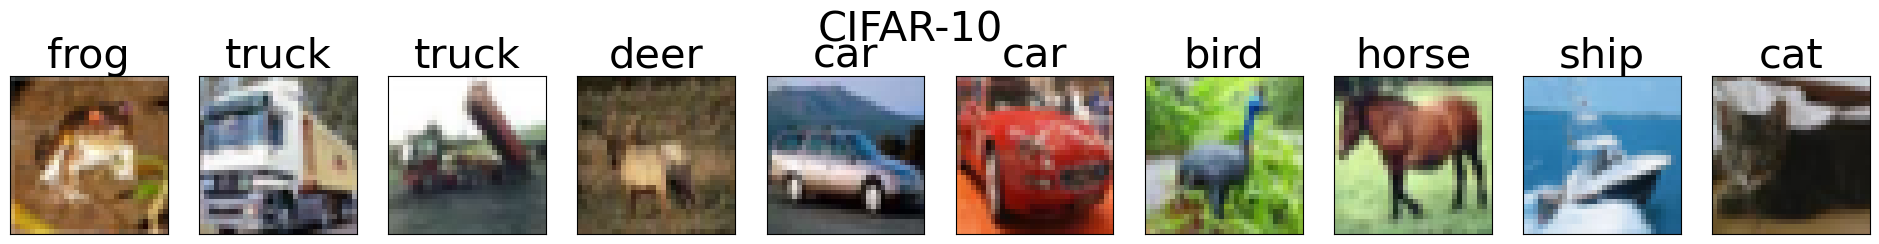

In [44]:
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(24,3))
plt.suptitle("CIFAR-10", fontsize=30)
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[y_train[i,0]], fontsize=30)
plt.show()

## 필기 숫자 인식

### 다층 퍼셉트론으로 MNIST 인식하기 (SGD Optimizer)

In [45]:
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [46]:
mlp_sgd = Sequential()
mlp_sgd.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp_sgd.add(Dense(units=10, activation='softmax'))
mlp_sgd.compile(loss='MSE', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
history_sgd = mlp_sgd.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test), verbose=2)

Epoch 1/50


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 - 1s - 3ms/step - accuracy: 0.1500 - loss: 0.0892 - val_accuracy: 0.2191 - val_loss: 0.0863
Epoch 2/50
469/469 - 1s - 2ms/step - accuracy: 0.3055 - loss: 0.0829 - val_accuracy: 0.3813 - val_loss: 0.0798
Epoch 3/50
469/469 - 1s - 2ms/step - accuracy: 0.4448 - loss: 0.0763 - val_accuracy: 0.5054 - val_loss: 0.0729
Epoch 4/50
469/469 - 1s - 2ms/step - accuracy: 0.5487 - loss: 0.0695 - val_accuracy: 0.5869 - val_loss: 0.0659
Epoch 5/50
469/469 - 1s - 2ms/step - accuracy: 0.6108 - loss: 0.0628 - val_accuracy: 0.6473 - val_loss: 0.0592
Epoch 6/50
469/469 - 1s - 2ms/step - accuracy: 0.6629 - loss: 0.0568 - val_accuracy: 0.7003 - val_loss: 0.0535
Epoch 7/50
469/469 - 1s - 2ms/step - accuracy: 0.7103 - loss: 0.0518 - val_accuracy: 0.7424 - val_loss: 0.0487
Epoch 8/50
469/469 - 1s - 2ms/step - accuracy: 0.7470 - loss: 0.0475 - val_accuracy: 0.7750 - val_loss: 0.0447
Epoch 9/50
469/469 - 1s - 2ms/step - accuracy: 0.7743 - loss: 0.0439 - val_accuracy: 0.7953 - val_loss: 0.0414
Epoch 10/50


In [47]:
res_sgd = mlp_sgd.evaluate(x_test, y_test, verbose=0)
print('accuracy =', res_sgd[1] * 100, '%')

accuracy = 89.410001039505 %


### Adam Optimizer를 사용하여 성능 향상

In [48]:
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [49]:
mlp_adam = Sequential()
mlp_adam.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp_adam.add(Dense(units=10, activation='softmax'))
mlp_adam.compile(loss='MSE', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history_adam = mlp_adam.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test), verbose=2)

Epoch 1/50
469/469 - 2s - 4ms/step - accuracy: 0.9023 - loss: 0.0147 - val_accuracy: 0.9318 - val_loss: 0.0105
Epoch 2/50
469/469 - 1s - 3ms/step - accuracy: 0.9434 - loss: 0.0088 - val_accuracy: 0.9505 - val_loss: 0.0076
Epoch 3/50
469/469 - 1s - 3ms/step - accuracy: 0.9586 - loss: 0.0065 - val_accuracy: 0.9612 - val_loss: 0.0060
Epoch 4/50
469/469 - 1s - 3ms/step - accuracy: 0.9683 - loss: 0.0051 - val_accuracy: 0.9663 - val_loss: 0.0052
Epoch 5/50
469/469 - 1s - 3ms/step - accuracy: 0.9756 - loss: 0.0041 - val_accuracy: 0.9696 - val_loss: 0.0048
Epoch 6/50
469/469 - 1s - 3ms/step - accuracy: 0.9796 - loss: 0.0034 - val_accuracy: 0.9732 - val_loss: 0.0041
Epoch 7/50
469/469 - 1s - 3ms/step - accuracy: 0.9831 - loss: 0.0028 - val_accuracy: 0.9746 - val_loss: 0.0039
Epoch 8/50
469/469 - 1s - 3ms/step - accuracy: 0.9865 - loss: 0.0023 - val_accuracy: 0.9767 - val_loss: 0.0036
Epoch 9/50
469/469 - 1s - 3ms/step - accuracy: 0.9886 - loss: 0.0020 - val_accuracy: 0.9773 - val_loss: 0.0036
E

In [50]:
res_adam = mlp_adam.evaluate(x_test, y_test, verbose=0)
print('accuracy =', res_adam[1] * 100, '%')

accuracy = 98.01999926567078 %


## 성능 시각화

### SGD & Adam 성능을 그래프로 비교

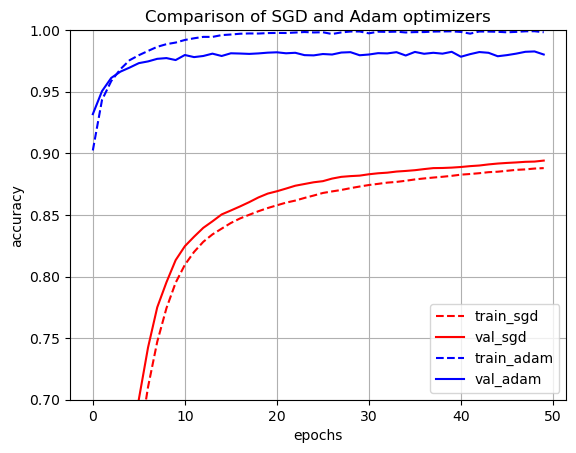

In [51]:
plt.plot(history_sgd.history['accuracy'], 'r--')
plt.plot(history_sgd.history['val_accuracy'], 'r')
plt.plot(history_adam.history['accuracy'], 'b--')
plt.plot(history_adam.history['val_accuracy'], 'b')
plt.title('Comparison of SGD and Adam optimizers')
plt.ylim((0.7, 1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_sgd', 'val_sgd', 'train_adam', 'val_adam'])
plt.grid()
plt.show()

## 하이퍼 매개변수 다루기

### 깊은 다층 퍼셉트론으로 MNIST 인식

In [66]:
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [67]:
mlp_adam = Sequential()
mlp_adam.add(Dense(units=1024, activation='relu', input_shape=(784,)))
mlp_adam.add(Dense(units=512, activation='relu'))
mlp_adam.add(Dense(units=512, activation='relu'))
mlp_adam.add(Dense(units=10, activation='softmax'))
mlp_adam.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
hist = mlp_adam.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test), verbose=2)

Epoch 1/50
469/469 - 5s - 10ms/step - accuracy: 0.8945 - loss: 0.4035 - val_accuracy: 0.9484 - val_loss: 0.1739
Epoch 2/50
469/469 - 5s - 10ms/step - accuracy: 0.9583 - loss: 0.1457 - val_accuracy: 0.9596 - val_loss: 0.1376
Epoch 3/50
469/469 - 5s - 10ms/step - accuracy: 0.9711 - loss: 0.0995 - val_accuracy: 0.9692 - val_loss: 0.0974
Epoch 4/50
469/469 - 5s - 11ms/step - accuracy: 0.9790 - loss: 0.0715 - val_accuracy: 0.9753 - val_loss: 0.0824
Epoch 5/50
469/469 - 5s - 10ms/step - accuracy: 0.9845 - loss: 0.0537 - val_accuracy: 0.9749 - val_loss: 0.0826
Epoch 6/50
469/469 - 5s - 11ms/step - accuracy: 0.9883 - loss: 0.0411 - val_accuracy: 0.9773 - val_loss: 0.0738
Epoch 7/50
469/469 - 5s - 10ms/step - accuracy: 0.9913 - loss: 0.0312 - val_accuracy: 0.9788 - val_loss: 0.0660
Epoch 8/50
469/469 - 4s - 9ms/step - accuracy: 0.9934 - loss: 0.0247 - val_accuracy: 0.9785 - val_loss: 0.0714
Epoch 9/50
469/469 - 5s - 10ms/step - accuracy: 0.9952 - loss: 0.0181 - val_accuracy: 0.9787 - val_loss: 

In [54]:
res_adam = mlp_adam.evaluate(x_test, y_test, verbose=0)
print('accuracy =', res_adam[1] * 100, '%')

accuracy = 98.51999878883362 %


In [55]:
mlp_adam.save('mlp_adam.h5')

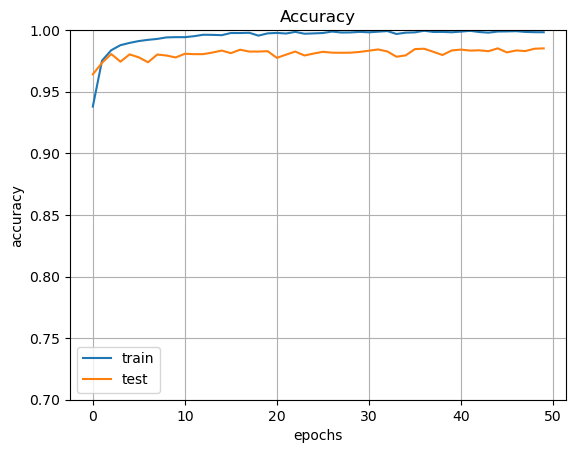

In [59]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.ylim((0.7, 1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

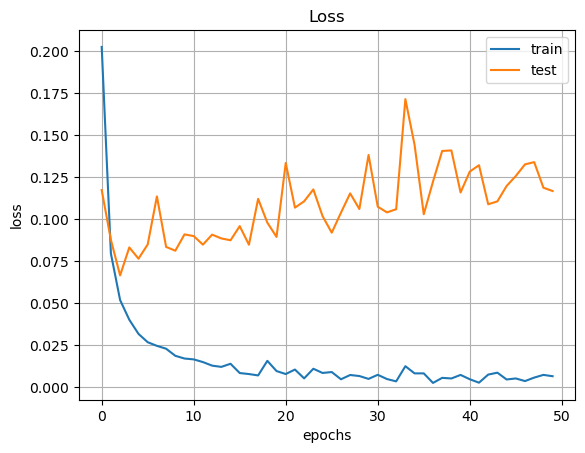

In [60]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

## 자연 영상 인식

### 깊은 다층 퍼셉트론으로 CIFAR-10 인식하기

In [61]:
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
x_train = x_train.reshape(50000, 3072).astype('float32') / 255.0
x_test = x_test.reshape(10000, 3072).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [62]:
mlp_adam = Sequential()
mlp_adam.add(Dense(units=1024, activation='relu', input_shape=(3072,)))
mlp_adam.add(Dense(units=512, activation='relu'))
mlp_adam.add(Dense(units=512, activation='relu'))
mlp_adam.add(Dense(units=10, activation='softmax'))
mlp_adam.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
hist = mlp_adam.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test), verbose=2)

Epoch 1/50


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


391/391 - 8s - 20ms/step - accuracy: 0.3496 - loss: 1.8201 - val_accuracy: 0.3750 - val_loss: 1.7333
Epoch 2/50
391/391 - 7s - 17ms/step - accuracy: 0.4212 - loss: 1.6313 - val_accuracy: 0.4486 - val_loss: 1.5632
Epoch 3/50
391/391 - 7s - 17ms/step - accuracy: 0.4510 - loss: 1.5448 - val_accuracy: 0.4479 - val_loss: 1.5406
Epoch 4/50
391/391 - 7s - 17ms/step - accuracy: 0.4764 - loss: 1.4822 - val_accuracy: 0.4490 - val_loss: 1.5397
Epoch 5/50
391/391 - 7s - 17ms/step - accuracy: 0.4917 - loss: 1.4325 - val_accuracy: 0.4770 - val_loss: 1.4705
Epoch 6/50
391/391 - 7s - 17ms/step - accuracy: 0.5100 - loss: 1.3843 - val_accuracy: 0.4985 - val_loss: 1.4195
Epoch 7/50
391/391 - 7s - 17ms/step - accuracy: 0.5214 - loss: 1.3483 - val_accuracy: 0.4897 - val_loss: 1.4191
Epoch 8/50
391/391 - 7s - 17ms/step - accuracy: 0.5352 - loss: 1.3123 - val_accuracy: 0.5067 - val_loss: 1.3861
Epoch 9/50
391/391 - 7s - 17ms/step - accuracy: 0.5505 - loss: 1.2805 - val_accuracy: 0.5086 - val_loss: 1.3802
Epo

In [63]:
res_adam = mlp_adam.evaluate(x_test, y_test, verbose=0)
print('accuracy =', res_adam[1] * 100, '%')

accuracy = 55.080002546310425 %


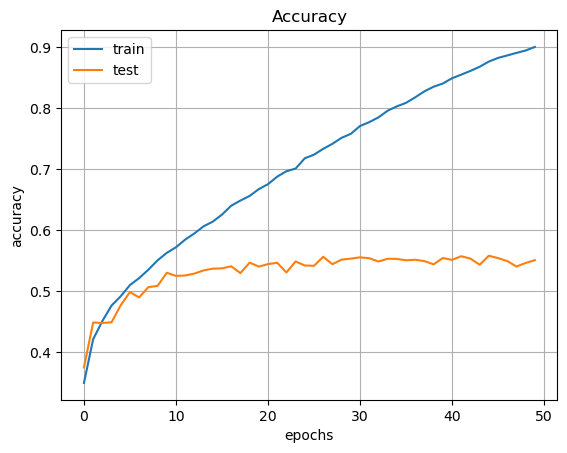

In [64]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

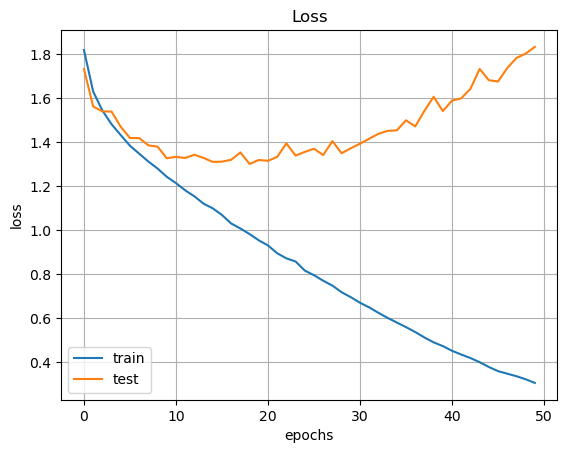

In [65]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.grid()
plt.show()